word2vec 

Tutorial: https://rare-technologies.com/word2vec-tutorial/

Docs: https://radimrehurek.com/gensim/models/word2vec.html

Gensim info: https://github.com/RaRe-Technologies/gensim-data

Glove data set info: https://nlp.stanford.edu/projects/glove/

In [ ]:
# Load in everything 
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
import gensim.downloader as api

import pandas as pd
import numpy as np

import seaborn as sn
import matplotlib.pyplot as plt

In [ ]:
analyses_dir = '/Users/kwegner-clemens/Google Drive/*research/semanticDistance/analyses/'
data_dir = '/Users/kwegner-clemens/Google Drive/*research/semanticDistance/data/'

In [ ]:
model = api.load("fasttext-wiki-news-subwords-300")  # download the model and return as object ready for use

In [ ]:
model.similarity('cat','dog')

0.75022984

In [ ]:
def distCalc(inmat, filename):
    outmat = []

    for a in range(len(inmat)):
        wordA = inmat[a];
    
        for b in range(len(inmat)):
            wordB = inmat[b];
        
            val = model.similarity(wordA, wordB)
            outmat.append([wordA, wordB, val])
    
    psDF = pd.DataFrame(outmat)
    psDF.to_csv(data_dir + 'probDFs/' + filename)
    
    return outmat

In [ ]:
animals = ['cat','cow','dog','duck','frog','horse','pig','rooster','sheep','songbird',]

amat = distCalc(animals, 'animalProbs_w2v.csv')

In [ ]:
instr = ['bell', 'drum','flute','guitar','harp','piano','tambourine','trumpet','violin','xylophone']
imat = distCalc(instr, 'instrProbs_w2v.csv')

In [ ]:
hh = ['basketball', 'camera', 'clock','doorbell','glass','paper','phone','pingpong','toilet','whistle']
hmat = distCalc(hh, 'hhProbs_w2v.csv')

<AxesSubplot:xlabel='A', ylabel='B'>

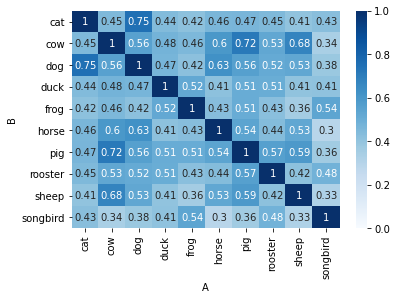

In [ ]:
adf = pd.DataFrame(data=amat, columns = ['A', 'B', 'sim'])
adf

animal_sim = adf.pivot(index='B', columns='A', values = 'sim')
sn.heatmap(animal_sim, annot=True, cmap="Blues", vmin=0, vmax=1)

<AxesSubplot:xlabel='B', ylabel='A'>

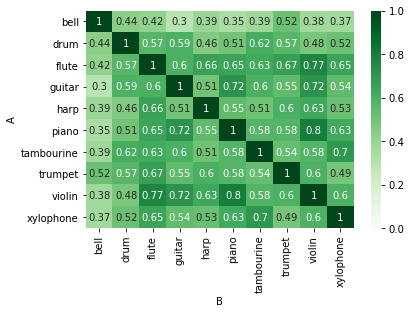

In [ ]:
idf = pd.DataFrame(data=imat, columns = ['A', 'B', 'sim'])

instr_sim = idf.pivot(index='A', columns='B', values = 'sim')
sn.heatmap(instr_sim, annot=True, cmap="Greens", vmin=0, vmax=1)

<AxesSubplot:xlabel='B', ylabel='A'>

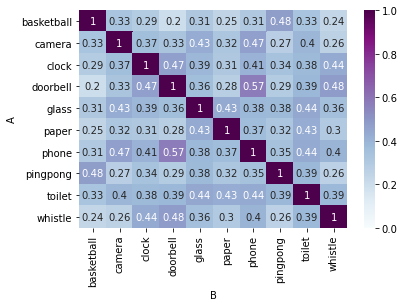

In [ ]:
hdf = pd.DataFrame(data=hmat, columns = ['A', 'B', 'sim'])

hh_sim = hdf.pivot(index='A', columns='B', values = 'sim')
sn.heatmap(hh_sim, annot=True, cmap="BuPu", vmin=0, vmax=1)